In [3]:
print("Hello World!")

Hello World!


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns
%matplotlib inline

/home/gk/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Using Kaggle for datasets
Dataset for applying data analysis are taken from kaggle via kagglehub


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datascientistanna/customers-dataset")
path+="/Customers.csv"
print("Path to dataset files:", path)

Path to dataset files: /home/gk/.cache/kagglehub/datasets/datascientistanna/customers-dataset/versions/1/Customers.csv


In [6]:
print(path)
sales_data=pd.read_csv(path,index_col='CustomerID')
sales_data

/home/gk/.cache/kagglehub/datasets/datascientistanna/customers-dataset/versions/1/Customers.csv


,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,Male,19,15000,39,Healthcare,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1996,Female,71,184387,40,Artist,8,7
1997,Female,91,73158,32,Doctor,7,7
1998,Male,87,90961,14,Healthcare,9,2


# Basic linear regression using gradient descent

Gradient descent has been used as the optimizing function and mean square error is used as cost function. The processes have been modularized for gradient calculation, cost calculation and computing newer weights and model training. Each step is divised into a function.


In [7]:
def gradient_calc(W,X,b,Y):
    w_gradient_sum=0
    b_gradient_sum=0
    for i in range(X.shape[0]):
        w_gradient_sum+=((np.dot(W,X[i])+b)-Y[i])*X[i]
        b_gradient_sum+=((np.dot(W,X[i])+b)-Y[i])
    return w_gradient_sum/len(X),b_gradient_sum/len(X)

In [8]:
def calculate_cost(W,X,b,Y):
    cost=0

    for i in range(X.shape[0]):
        cost+=((np.dot(W,X[i])+b)-Y[i])**2
    return cost/len(X)*2    

In [9]:
def gradient_descent_calc(W,X,b,Y,alpha,error_margin,iterations):
    
    if len(W)==0:
        weights = np.random.rand(X.shape[1])  # Initialize weights with the number of features
    else:
        weights = W

    if len(b) ==0:  
        biases = np.random.rand(1)[0]  
    else:
        biases = b
    print(f"Initial W: {weights} Initial B: {biases}")   
    cost_history=[]
    m,n=X.shape
    iter_count=0
    while iter_count!=iterations:
        cost_value=calculate_cost(weights,X,biases,Y)
        cost_history.append(cost_value)
        if cost_value<=error_margin:
            print("Error margin reached")
            break
        new_w,new_b=gradient_calc(weights,X,biases,Y)
        weights=weights - alpha * new_w
        biases=biases - alpha * new_b
        iter_count+=1
        print(weights,biases,cost_value,iter_count)
    
    
    return weights,biases,cost_history

    

As the base steps of gradient descent are completed, testing the created set of functions is needed.


Testing the model using various custom simple data points which are simple in pattern and can be easily inferred to check its accuracy.

In [28]:
# X_train = np.array([[1], [2], [3], [4]])  # 4 training samples
# Y_train = np.array([2, 3, 5, 7])

# X_train = np.array([[1, 2],
#                     [2, 3],
#                     [3, 4],
#                     [4, 5],
#                     [5, 6]])

# # Corresponding target values
# Y_train = np.array([3, 5, 7, 9, 11])

X_train = np.array([[1**2],  # 1, 1, 1
                    [2**2],  # 4, 8, 16
                    [3**2],  # 9, 27, 81
                    [4**2],  # 16, 64, 256
                    [5**2]]) # 25, 125, 625

# Corresponding target values
Y_train = np.array([2, 3, 4, 5, 6])  # You can set any desired pattern

predicted_w,predicted_b,cost_history=gradient_descent_calc([],X_train,[],Y_train,0.00002,0.01,2000)
predicted_x=np.dot(predicted_w,[25**2])+predicted_b
print(f"predicted x is {predicted_x} ")
print(f"line eqn: {predicted_w}x+{predicted_b})")
print(f"final cost is {cost_history[-1]}, predicted w :{predicted_w} and predicted b :{predicted_b}")
# for i in cost_history:
#     print(f"{i}\n")

Initial W: [0.89184725] Initial B: 0.3033175775214396
[0.88940805] 0.3031953047743867 154.93502685210228 1
[0.88697842] 0.3030735710976043 153.7444368434259 2
[0.88455834] 0.3029523743729702 152.56318229756047 3
[0.88214776] 0.30283171249068297 151.3911900120194 4
[0.87974665] 0.3027115833492294 150.2283873583213 5
[0.87735496] 0.3025919848553517 149.07470227748905 6
[0.87497267] 0.3024729149240154 147.93006327558413 7
[0.87259973] 0.3023543714783766 146.7943994192759 8
[0.87023611] 0.3022363524497503 145.66764033144585 9
[0.86788178] 0.3021188557775778 144.5497161868259 10
[0.86553669] 0.3020018794093953 143.44055770767136 11
[0.8632008] 0.30188542130080187 142.34009615946746 12
[0.8608741] 0.3017694794154276 141.24826334667006 13
[0.85855652] 0.30165405172490234 140.16499160847872 14
[0.85624805] 0.30153913620882417 139.09021381464433 15
[0.85394865] 0.30142473085472804 138.0238633613085 16
[0.85165827] 0.3013108336580547 136.96587416687595 17
[0.84937689] 0.30119744262211956 135.916

[0.59140715] 0.28892916266895086 43.87412773672939 168
[0.59014764] 0.2888732745124903 43.55434467805647 169
[0.58889307] 0.28881766456705305 43.23706879401014 170
[0.58764342] 0.2887623317392726 42.92228042499948 171
[0.58639868] 0.28870727494007786 42.6099600655909 172
[0.58515883] 0.2886524930846758 42.300088363299515 173
[0.58392384] 0.28859798509253487 41.992646117389754 174
[0.58269371] 0.2885437498873684 41.6876142776854 175
[0.5814684] 0.2884897863971178 41.384973943389106 176
[0.5802479] 0.28843609355393585 41.08470636191098 177
[0.57903219] 0.2883826702941702 40.786792927706486 178
[0.57782126] 0.28832951555834707 40.491215181123415 179
[0.57661508] 0.28827662829115464 40.19795480725783 180
[0.57541363] 0.2882240074414268 39.9069936348191 181
[0.5742169] 0.28817165196212674 39.618313635003844 182
[0.57302487] 0.2881195608103309 39.3318969203785 183
[0.57183752] 0.2880677329472127 39.04772574377083 184
[0.57065483] 0.28801616733802654 38.765782497170186 185
[0.56947678] 0.2879

[0.4160787] 0.2820745659941577 11.468503408201032 369
[0.41550728] 0.2820573871890103 11.40275316671094 370
[0.4149381] 0.28204033443996895 11.337518144482704 371
[0.41437115] 0.2820234072513908 11.272794301514809 372
[0.41380643] 0.2820066051295801 11.208577629484724 373
[0.41324392] 0.28198992758278046 11.144864151500524 374
[0.41268362] 0.2819733741211674 11.08164992185443 375
[0.41212552] 0.28195694425684065 11.018931025778263 376
[0.4115696] 0.28194063750381654 10.956703579200875 377
[0.41101587] 0.2819244533780205 10.894963728507406 378
[0.41046431] 0.2819083913972798 10.833707650300488 379
[0.40991491] 0.2818924510813156 10.7729315511633 380
[0.40936767] 0.281876631951736 10.712631667424446 381
[0.40882257] 0.2818609335320283 10.652804264924777 382
[0.40827961] 0.2818453553475517 10.593445638785909 383
[0.40773878] 0.28182989692553007 10.534552113180652 384
[0.40720008] 0.2818145577950445 10.47612004110523 385
[0.40666348] 0.281799337487026 10.418145804153221 386
[0.40612899] 0.

[0.33598887] 0.2806061950794859 4.775099005469956 572
[0.3357314] 0.28060666540421286 4.761762966206741 573
[0.33547495] 0.2806071923620043 4.7485311499649985 574
[0.33521949] 0.2806077757299385 4.735402739502406 575
[0.33496504] 0.2806084152859693 4.722376923984934 576
[0.33471158] 0.2806091108089229 4.709452898936555 577
[0.33445912] 0.28060986207849437 4.69662986618941 578
[0.33420764] 0.2806106688752442 4.683907033834356 579
[0.33395715] 0.280611530980595 4.671283616171858 580
[0.33370764] 0.2806124481768279 4.658758833663326 581
[0.33345911] 0.2806134202470794 4.6463319128827845 582
[0.33321155] 0.28061444697533794 4.634002086468952 583
[0.33296495] 0.28061552814644053 4.621768593077692 584
[0.33271933] 0.2806166635460694 4.609630677334816 585
[0.33247466] 0.2806178529607487 4.597587589789276 586
[0.33223096] 0.2806190961778413 4.585638586866715 587
[0.3319882] 0.28062039298554525 4.57378293082341 588
[0.3317464] 0.28062174317289074 4.562019889700522 589
[0.33150555] 0.28062314652

[0.30010765] 0.2815917174840728 3.419424946682797 773
[0.29999048] 0.2816000619672663 3.4166490932930413 774
[0.29987376] 0.2816084320613497 3.4138946580368215 775
[0.2997575] 0.281616827665269 3.4111614729726796 776
[0.2996417] 0.28162524867836697 3.408449371476043 777
[0.29952634] 0.2816336950003819 3.4057581882289014 778
[0.29941144] 0.2816421665314459 3.4030877592095536 779
[0.29929698] 0.28165066317208354 3.400437921682454 780
[0.29918297] 0.28165918482320995 3.3978085141881125 781
[0.2990694] 0.2816677313861297 3.395199376533102 782
[0.29895628] 0.281676302762535 3.3926103497801288 783
[0.2988436] 0.28168489885450426 3.3900412762381698 784
[0.29873136] 0.28169351956450056 3.3874919994527204 785
[0.29861955] 0.28170216479537014 3.384962364196081 786
[0.29850818] 0.2817108344503409 3.382452216457749 787
[0.29839725] 0.2817195284330209 3.379961403434865 788
[0.29828675] 0.28172824664739693 3.3774897735227514 789
[0.29817668] 0.2817369889978329 3.375037176305516 790
[0.29806704] 0.28

[0.28359] 0.2837073546934795 3.131943195882856 977
[0.28353704] 0.28371929074736907 3.131350647306932 978
[0.28348429] 0.28373123821242646 3.1307623979204724 979
[0.28343175] 0.28374319704338025 3.1301784140173816 980
[0.2833794] 0.2837551671951367 3.1295986621558622 981
[0.28332726] 0.2837671486227794 3.1290231091563485 982
[0.28327533] 0.28377914128156834 3.1284517220994426 983
[0.28322359] 0.28379114512693915 3.127884468323882 984
[0.28317205] 0.2838031601145027 3.127321315424512 985
[0.28312071] 0.2838151862000441 3.1267622312502743 986
[0.28306957] 0.28382722333952226 3.1262071839022205 987
[0.28301863] 0.28383927148906907 3.125656141731533 988
[0.28296788] 0.28385133060498874 3.1251090733375593 989
[0.28291734] 0.28386340064375715 3.1245659475658742 990
[0.28286698] 0.2838754815620212 3.124026733506342 991
[0.28281682] 0.283887573316598 3.123491400491205 992
[0.28276686] 0.28389967586447434 3.1229599180931813 993
[0.28271708] 0.28391178916280607 3.122432256123579 994
[0.2826675] 

[0.27624312] 0.2862451159515058 3.0679724625369933 1175
[0.27621838] 0.28625861756201526 3.067812890827129 1176
[0.27619373] 0.28627212434573185 3.0676542242355986 1177
[0.27616918] 0.2862856362818899 3.067496455670341 1178
[0.27614472] 0.28629915334980527 3.067339578094903 1179
[0.27612035] 0.28631267552887507 3.067183584528006 1180
[0.27609607] 0.2863262027985774 3.0670284680431177 1181
[0.27607189] 0.28633973513847094 3.0668742217680154 1182
[0.2760478] 0.28635327252819465 3.0667208388843634 1183
[0.2760238] 0.2863668149474676 3.0665683126272922 1184
[0.27599989] 0.2863803623760883 3.0664166362849805 1185
[0.27597607] 0.2863939147939349 3.0662658031982324 1186
[0.27595234] 0.2864074721809644 3.066115806760068 1187
[0.2759287] 0.2864210345172126 3.0659666404153207 1188
[0.27590515] 0.2864346017827938 3.0658182976602197 1189
[0.27588169] 0.2864481739579003 3.0656707720419942 1190
[0.27585832] 0.28646175102280225 3.0655240571584725 1191
[0.27583504] 0.28647533295784744 3.06537814665768

[0.27276014] 0.2890256689578003 3.0474772028061006 1375
[0.27274843] 0.289039881213357 3.047409218732336 1376
[0.27273676] 0.28905409576182783 3.047341422660486 1377
[0.27272513] 0.28906831259376264 3.047273813121619 1378
[0.27271354] 0.2890825316997484 3.047206388658325 1379
[0.272702] 0.28909675307040905 3.047139147824621 1380
[0.27269049] 0.28911097669640545 3.0470720891858614 1381
[0.27267903] 0.2891252025684351 3.04700521131865 1382
[0.27266761] 0.289139430677232 3.046938512810755 1383
[0.27265624] 0.28915366101356665 3.046871992261014 1384
[0.2726449] 0.2891678935682457 3.0468056482792543 1385
[0.27263361] 0.289182128332112 3.0467394794862046 1386
[0.27262235] 0.2891963652960443 3.0466734845134043 1387
[0.27261114] 0.2892106044509573 3.046607662003127 1388
[0.27259997] 0.28922484578780133 3.046542010608294 1389
[0.27258884] 0.28923908929756226 3.046476528992386 1390
[0.27257775] 0.2892533349712614 3.0464112158293646 1391
[0.2725667] 0.28926758279995524 3.046346069803591 1392
[0.2

[0.27110173] 0.2918598472659686 3.036403072134674 1572
[0.27109589] 0.2918743676883462 3.036354043866926 1573
[0.27109006] 0.29188888910589467 3.0363050559962597 1574
[0.27108426] 0.2919034115142626 3.036256108211152 1575
[0.27107847] 0.2919179349091156 3.036207200202516 1576
[0.27107271] 0.2919324592861364 3.0361583316636933 1577
[0.27106696] 0.29194698464102464 3.0361095022904285 1578
[0.27106124] 0.29196151096949685 3.036060711780851 1579
[0.27105553] 0.2919760382672864 3.0360119598354602 1580
[0.27104984] 0.2919905665301435 3.0359632461570984 1581
[0.27104417] 0.2920050957538349 3.035914570450943 1582
[0.27103852] 0.29201962593414404 3.035865932424481 1583
[0.27103289] 0.2920341570668711 3.035817331787494 1584
[0.27102728] 0.2920486891478325 3.035768768252038 1585
[0.27102168] 0.29206322217286124 3.0357202415324283 1586
[0.27101611] 0.2920777561378067 3.035671751345218 1587
[0.27101055] 0.2920922910385345 3.035623297409184 1588
[0.27100502] 0.2921068268709266 3.0355748794453103 158

[0.27034479] 0.29431034462145556 3.02855291350607 1740
[0.27034137] 0.29432498256130063 3.0285077140197645 1741
[0.27033796] 0.29433962096044897 3.028462525787118 1742
[0.27033456] 0.2943542598166548 3.028417348725116 1743
[0.27033117] 0.29436889912768116 3.028372182751392 1744
[0.2703278] 0.29438353889129987 3.0283270277842265 1745
[0.27032443] 0.2943981791052915 3.028281883742541 1746
[0.27032107] 0.2944128197674453 3.0282367505458914 1747
[0.27031772] 0.29442746087555943 3.028191628114466 1748
[0.27031438] 0.29444210242744046 3.0281465163690786 1749
[0.27031106] 0.29445674442090364 3.028101415231162 1750
[0.27030774] 0.29447138685377283 3.0280563246227663 1751
[0.27030443] 0.29448602972388044 3.028011244466552 1752
[0.27030113] 0.2945006730290674 3.027966174685789 1753
[0.27029784] 0.2945153167671832 3.0279211152043453 1754
[0.27029456] 0.2945299609360856 3.0278760659466863 1755
[0.27029129] 0.2945446055336409 3.0278310268378705 1756
[0.27028803] 0.29455925055772386 3.02778599780354

[0.26984214] 0.2970829838461307 3.0201439350469097 1929
[0.26984008] 0.29709767691517475 3.0200999067060925 1930
[0.26983803] 0.29711237014357617 3.020055881422158 1931
[0.26983598] 0.2971270635302681 3.0200118591763476 1932
[0.26983393] 0.2971417570741879 3.0199678399500525 1933
[0.26983189] 0.29715645077427705 3.0199238237248047 1934
[0.26982985] 0.2971711446294813 3.0198798104822866 1935
[0.26982782] 0.2971858386387505 3.0198358002043215 1936
[0.2698258] 0.29720053280103853 3.019791792872875 1937
[0.26982377] 0.2972152271153035 3.0197477884700534 1938
[0.26982176] 0.2972299215805076 3.0197037869781047 1939
[0.26981974] 0.29724461619561704 3.0196597883794163 1940
[0.26981774] 0.2972593109596022 3.019615792656513 1941
[0.26981573] 0.2972740058714373 3.0195717997920553 1942
[0.26981373] 0.2972887009301009 3.0195278097688405 1943
[0.26981174] 0.29730339613457535 3.0194838225698013 1944
[0.26980975] 0.297318091483847 3.0194398381780054 1945
[0.26980777] 0.2973327869769064 3.0193958565766

# Logistic regression using gradient descent

While most of the steps are mirrored with the above model created through linear regression regarding the optimizing algorithm and flow of steps in the model, there are certain crucial changes implemented. The sigmoid function is used to compress the results into values between 0 and 1 for probabilistic output and the logistic regression cost function formula differs to the usual mean square error formula used previously on linear regression.


In [12]:
def sigmoid(f_x):
    return 1/(1+np.exp(-(f_x)))

In [13]:
def logistic_cf(W,X,y,b):
    cost=0
    m,n=X.shape
    for i in range(m):
        f_x=np.dot(W,X[i])+b
        g_x=sigmoid(f_x)
        cost+= y[i] * (np.log(g_x)) + (1-y[i]) * (np.log(1-(g_x)))
    cost=(-1/m)*cost
    return cost

In [14]:
def logistic_gradient(W,X,y,b):
    m=X.shape[0]
    gradient_w=0
    gradient_b=0
    for i in range(m):
        f_x=np.dot(W,X[i])+b
        g_x=sigmoid(f_x)
        gradient_w+=(g_x-y[i])*X[i]
        gradient_b+=(g_x-y[i])
    return (1/m)*gradient_w,(1/m)*gradient_b

In [15]:
def logistic_gradient_descent(W,X,y,b,iterations,alpha,error_margin):
    m,n=X.shape
    
    if len(W)==0:
        W=np.random.rand(n)   
    
    if len(b)==0:
        b=np.random.rand(1)[0]
    cost_history=[]
        
    iter_count=0
    while iter_count<iterations:
        current_cost=logistic_cf(W,X,y,b)
        cost_history.append(current_cost)
        if current_cost>error_margin:
            grad_w,grad_b=logistic_gradient(W,X,y,b)
            W=W-alpha*grad_w
            b=b-alpha*grad_b
            iter_count+=1

        else:
            break
    return W,b,cost_history        

Similar types of different simple test cases are used

In [16]:
#hours of study and hours of sleep, value of hours of study must be over 4 for passing 
# X = np.array([
#     [2, 3],    # Sample 1: Will fail (0)
#     [3, 4],    # Sample 2: Will fail (0) 
#     [4, 5],    # Sample 3: Will fail (0)
#     [5, 3],    # Sample 4: Will pass (1)
#     [6, 4],    # Sample 5: Will pass (1)
#     [7, 5],    # Sample 6: Will pass (1)
#     [3, 6],    # Sample 7: Will fail (0)
#     [4, 7],    # Sample 8: Will pass (1)
#     [5, 6],    # Sample 9: Will pass (1)
#     [6, 3]     # Sample 10: Will pass (1)
# ])

# # Labels y
# y = np.array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1])

#############################################################################################
# X_below_boundary = np.column_stack((np.random.uniform(0, 4, 20), np.random.uniform(0, 20, 20)))
# X_above_boundary = np.column_stack((np.random.uniform(4, 8, 20), np.random.uniform(0, 20, 20)))

# # Combine data and labels
# X = np.vstack((X_below_boundary, X_above_boundary))
# y = np.array([0] * 20 + [1] * 20)

# # Shuffle data to ensure it's not ordered
# shuffled_indices = np.random.permutation(len(X))
# X, y = X[shuffled_indices], y[shuffled_indices]
#############################################################################################



X = np.array([[2, 1], [3, 2], [4, 1], [5, 3], [6, 2], [7, 1], 
              [2, 4], [3, 5], [4, 4], [5, 6], [6, 5], [7, 4]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
# y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1) 


W,b,cost_history=logistic_gradient_descent([],X,y,[],6000,0.1,0.0001)
# for i,j in enumerate(cost_history):
#     print(f' Cost : {j} iteration {i+1}')

In [17]:
def pred_logistic_regression(calculated_w,calculated_b,X):
    probability_value=sigmoid(pred_linear_regression(calculated_w,calculated_b,X))
    return True if probability_value>0.5 else False

In [18]:
def pred_linear_regression(calculated_w,calculated_b,X):
    return np.dot(calculated_w,X)+calculated_b

In [19]:
test_value=np.array([2,5])
inferred_x=np.dot(W,test_value)+b
pred=sigmoid(inferred_x)
# print(W,b)
if pred>=0.5:
    print("Passes Exam")
else:
    print("Fails exam")

# Visualization of decision boundary when only two features are present 
decision_boundary= [(x_1,(- (b + W[0] * x_1) / W[1])) for x_1 in range(8) ]
db_x=[i for i,j in decision_boundary]
db_y=[j for i,j in decision_boundary]
# print(decision_boundary)

Passes Exam


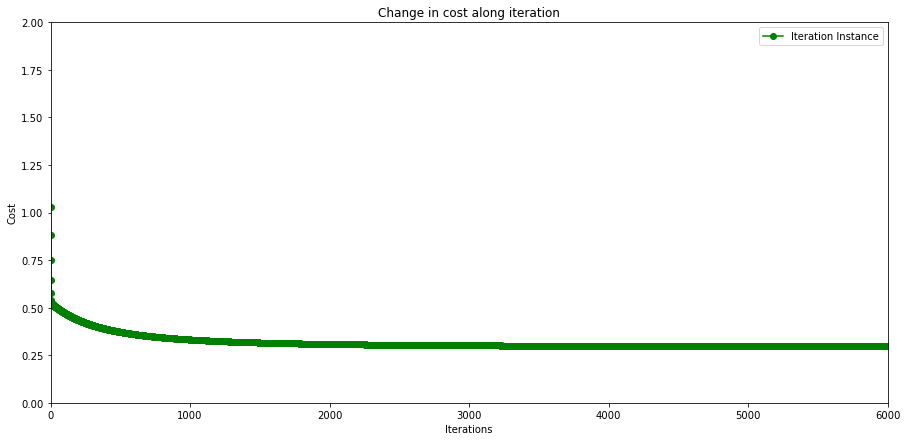

In [20]:
plt.figure(figsize=(15,7)) # must be declared first
plt.plot([i for i in range(len(cost_history))],cost_history,'go-',label='Iteration Instance')
plt.title('Change in cost along iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend(loc='best')
plt.xlim(0, 6000) #value limits 
plt.ylim(0, 2) #value limits

plt.show()

(0.0, 20.0)

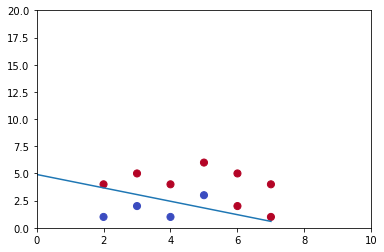

In [21]:
np
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)
plt.plot(db_x,db_y)
plt.xlim(0, 10) #value limits 
plt.ylim(0, 20) #value limits


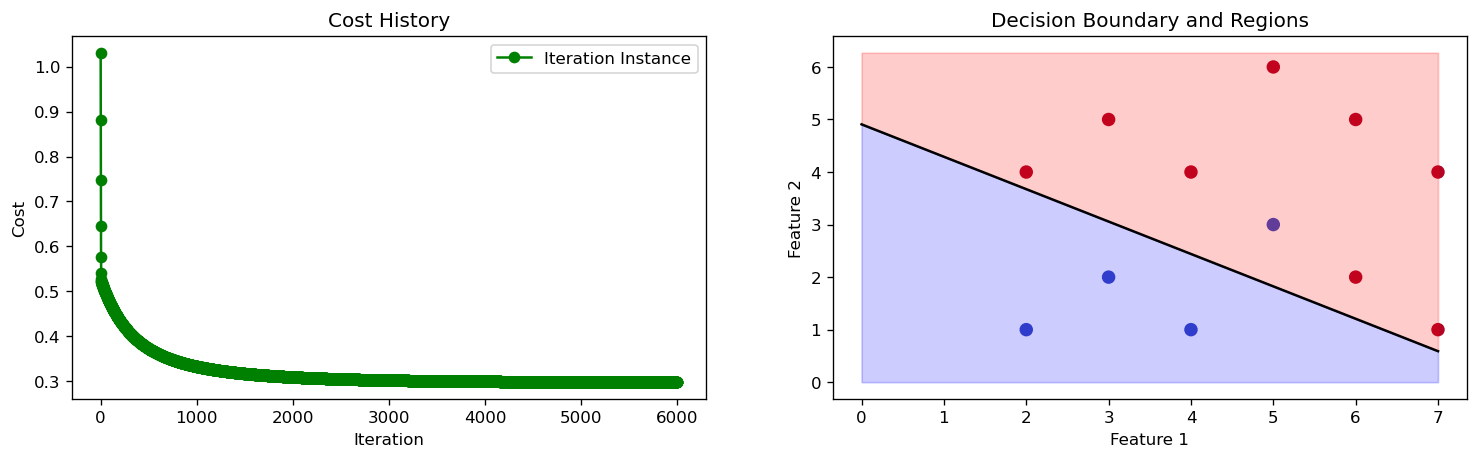

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4), dpi=120)

# Plot the cost history (iterations vs cost)
ax1.plot([i for i in range(len(cost_history))], cost_history, 'go-', label='Iteration Instance')
ax1.set_title('Cost History')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Cost')
ax1.legend()

# Scatter plot of data points and decision boundary
ax2.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, label='Data Points')

# Plot decision boundary
db_x = np.array(db_x)  # X coordinates of the decision boundary
db_y = np.array(db_y)  # Y coordinates of the decision boundary
ax2.plot(db_x, db_y, 'k-', label='Decision Boundary')

# Fill regions based on the decision boundary
# Above the boundary -> Class 1 Region
ax2.fill_between(db_x, db_y, y2=ax2.get_ylim()[1], color='red', alpha=0.2, label='Class 1 Region')
#fill from y1 to y2
# Below the boundary -> Class 2 Region
ax2.fill_between(db_x, db_y,   color='blue', alpha=0.2, label='Class 2 Region')
# Configure plot aesthetics
ax2.set_title('Decision Boundary and Regions')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
# ax1.xlim(0,5000)
# ax1.ylim(0,2)
# ax1. 
# plt.tight_layout()
plt.show()


In [23]:
sales_data

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,Male,19,15000,39,Healthcare,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1996,Female,71,184387,40,Artist,8,7
1997,Female,91,73158,32,Doctor,7,7
1998,Male,87,90961,14,Healthcare,9,2


In [24]:
new_sales=sales_data[['Annual Income ($)','Family Size']]

spending_score=sales_data[['Spending Score (1-100)']]



#standardized values for training
X_mean=(new_sales.mean())
X_std=new_sales.std()
X_standardized=(new_sales-X_mean)/X_std

#transforming into numpy
X_train=X_standardized.to_numpy()
Y_train=spending_score.to_numpy()
Y_train=Y_train.reshape(-1)

<AxesSubplot:>

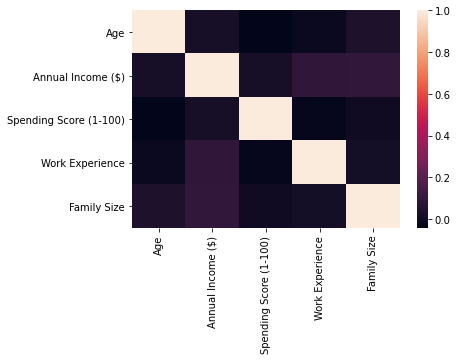

In [25]:

numeric_data=sales_data.drop(['Profession','Gender'],axis=1)
# new_sales=sales_data[['Annual Income ($)','Work Experience']]
correlation_matrix=numeric_data.corr()
sns.heatmap(correlation_matrix)

In [26]:

# predicted_w,predicted_b,cost_history=gradient_descent_calc([],X_train,[],Y_train,alpha=0.2,error_margin=0.01,iterations=1000)
# plt.plot([i for i in range(len(cost_history))],cost_history,'b')
# plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
